# Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars. 



# In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [1]:
!pip install selenium

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import NoSuchElementException

In [4]:
driver = webdriver.Chrome()
driver.maximize_window()

In [5]:
driver.get("https://www.amazon.in/")

In [6]:
search_box = driver.find_element(By.ID,"twotabsearchtextbox")
product_name = input("product you wanna search for :")
search_box.send_keys(product_name)

product you wanna search for :mobile


In [7]:
search_box.send_keys(Keys.RETURN)

In [8]:
products_url = []
product_names = []
brand_names = []
prices = []
return_exchanges = []
expected_deliveries = []
availabilities = []

In [9]:
start = 0
end = 2
for page in range(start,end):
    time.sleep(3)
    
    product_url = driver.find_elements(By.XPATH,'//h2 [@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a')
    
    for i in product_url:
        url = i.get_attribute('href')
        products_url.append(url)
            
next_button = driver.find_element(By.XPATH,'//*[@id="search"]/div[1]/div[1]/div/span[1]/div[1]/div[29]/div/div/span/a[3]')
next_button.click()
            

In [10]:
for i in products_url:
    driver.get(i)
    
    #brand_name
    try:
        brand_name = driver.find_element(By.XPATH,'//*[@id="productOverview_feature_div"]/div/table/tbody/tr[1]/td[2]/span')
        brand_names.append(brand_name.text)
    except NoSuchElementException as e:
        brand_names.append("-")   
    
    #product_name
    try:
        product_name = driver.find_element(By.XPATH,'//h1 [@class="a-size-large a-spacing-none"] ')
        product_names.append(product_name.text)
    except NoSuchElementException as e:
        product_names.append("-") 
        
   #price
    try:
        price = driver.find_element(By.XPATH,'//*[@id="corePriceDisplay_desktop_feature_div"]/div[1]/span[3]/span[2]/span[2] ')
        prices.append(price.text)
    except NoSuchElementException as e:
        prices.append("-")  
        
    #availability
    try:
        availability = driver.find_element(By.XPATH,'//div  [@class="a-section a-spacing-none a-spacing-top-micro }"] ')
        availabilities.append(availability.text)
    except NoSuchElementException as e:
        availabilities.append("-") 
        
     #return_exchange
    try:
        exchanges = driver.find_element(By.XPATH,'//span [@class="a-size-small a-color-link a-text-normal"] ')
        return_exchanges.append(exchanges.text)
    except NoSuchElementException as e:
        exchanges.append("-") 
        
      #deliveries
    try:
        delivery = driver.find_element(By.XPATH,'//*[@id="mir-layout-DELIVERY_BLOCK-slot-SECONDARY_DELIVERY_MESSAGE_LARGE"]/span ')
        expected_deliveries.append(delivery.text)
    except NoSuchElementException as e:
        expected_deliveries.append("-")    

In [11]:
print(len(products_url))
print(len(product_names))
print(len(brand_names))
print(len(prices))
print(len(return_exchanges))
print(len(expected_deliveries))
print(len(availabilities))


44
44
44
44
44
44
44


In [12]:
df=pd.DataFrame({})
df['Product Urls']=products_url
df['Name of the product']=product_names
df['Brand']=brand_names
df['Price']=prices
df['Return/Exchange']=return_exchanges
df['Delivery details']=expected_deliveries
df['Availability']=availabilities
df

,Product Urls,Name of the product,Brand,Price,Return/Exchange,Delivery details,Availability
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"Redmi Note 13 5G (Arctic White, 6GB RAM, 128GB...",Redmi,"16,999",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"Redmi 13C 5G (Startrail Green, 4GB RAM, 128GB ...",Redmi,"10,499",7 days Service Centre Replacement,-,In stock
2,https://www.amazon.in/Stardust-Storage-Powered...,"Redmi 13C (Stardust Black, 6GB RAM, 128GB Stor...",Xiaomi,"8,499",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock
3,https://www.amazon.in/Starshine-Storage-Powere...,"Redmi 13C (Starshine Green, 4GB RAM, 128GB Sto...",Xiaomi,"7,699",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock
4,https://www.amazon.in/Samsung-sAMOLED-Display-...,"Samsung Galaxy M34 5G (Prism Silver,6GB,128GB)...",Samsung,"12,999",7 days Service Centre Replacement,-,In stock
5,https://www.amazon.in/realme-Storage-Chipset-C...,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...",realme,"12,499",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock
6,https://www.amazon.in/POCO-C65-Matte-Black-128...,POCO C65 Matte Black 4GB RAM 128GB ROM,POCO,"6,799",7 days Service Centre Replacement,-,In stock
7,https://www.amazon.in/Samsung-Waterfall-sAMOLE...,"Samsung Galaxy M34 5G (Waterfall Blue,6GB,128G...",Samsung,-,Returns Policy,-,-
8,https://www.amazon.in/realme-Storage-Chipset-C...,"realme NARZO N65 5G (Amber Gold 6GB RAM, 128GB...",realme,"12,498",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock
9,https://www.amazon.in/Redmi-Jade-Black-6GB-128...,Redmi 12 5G Jade Black 6GB RAM 128GB ROM,Redmi,"12,499",7 days Service Centre Replacement,"Or fastest delivery Tomorrow, 21 June. Order w...",In stock


# =========================================

# Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [8]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from selenium.common.exceptions import NoSuchElementException

In [9]:
driver = webdriver.Chrome()
driver.maximize_window()
driver.get("https://images.google.com/?gws_rd=ssl")

In [10]:
# List of keywords 
keywords = ['fruits', 'cars', 'machine learning', 'guitar', 'cakes']

# an empty list to store image URLs
image_data = []

# Index variable for keywords.
current_keyword_index = 0


Keyword: fruits, Number of Image URLs: 10, URLs: ['', '', '', '', '', '', '', '', '', '']
Keyword: cars, Number of Image URLs: 10, URLs: ['', '', '', '', '', '', '', '', '', '']
Keyword: machine learning, Number of Image URLs: 10, URLs: ['', '', '', '', '', '', '', '', '', '']
Keyword: guitar, Number of Image URLs: 10, URLs: ['', '', '', '', '', '', '', '', '', '']
Keyword: cakes, Number of Image URLs: 10, URLs: ['', '', '', '', '', '', '', '', '', '']

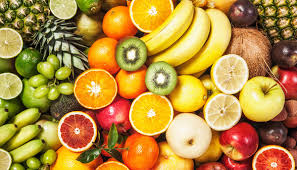
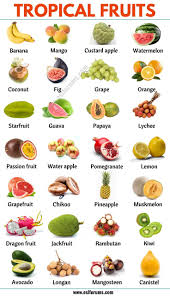
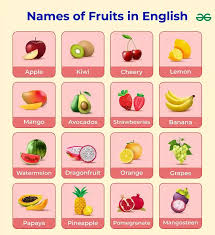
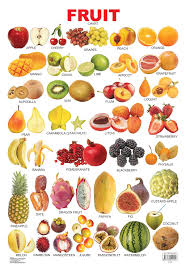
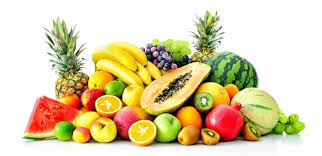
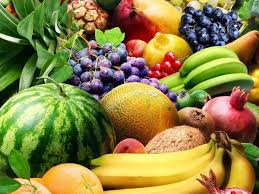
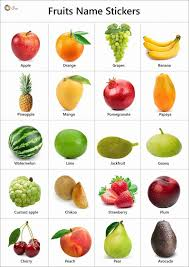
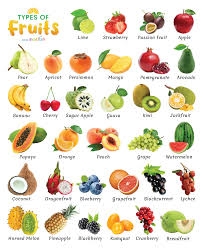
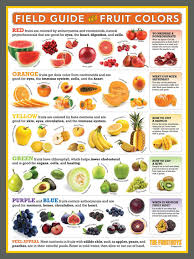
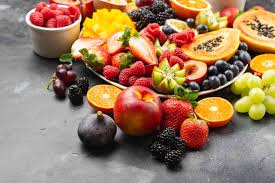
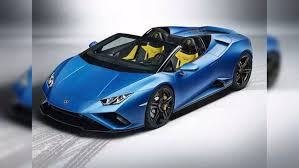
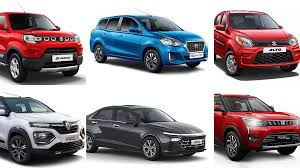
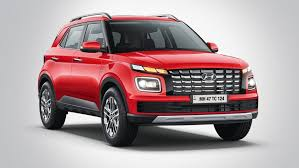
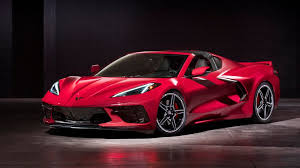
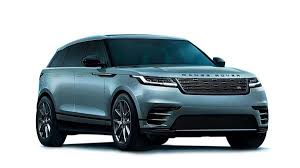
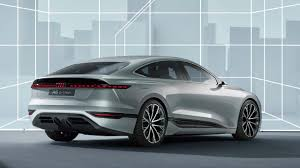
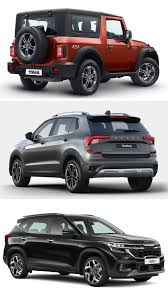
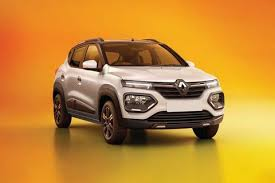
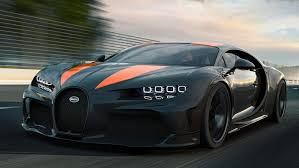
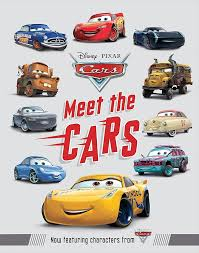
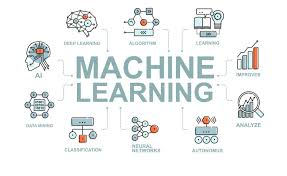
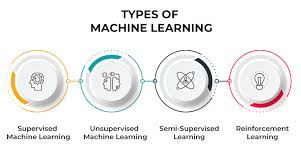
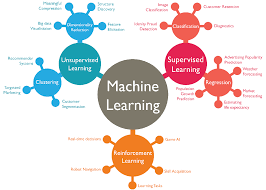
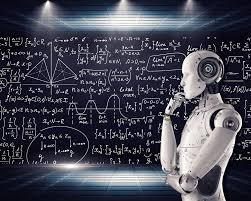
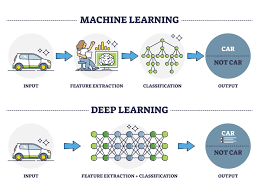
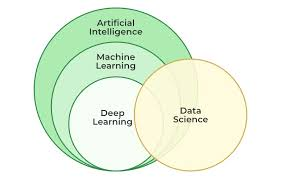
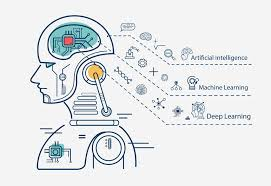
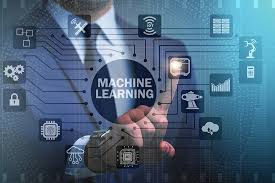
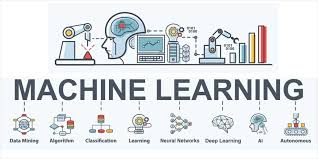
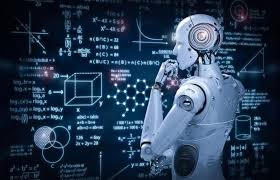
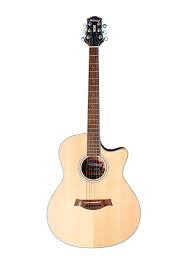
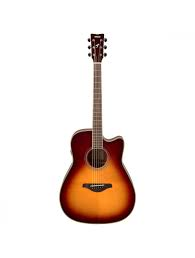
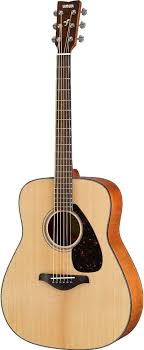
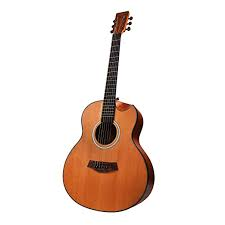
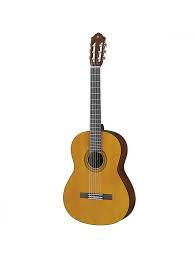
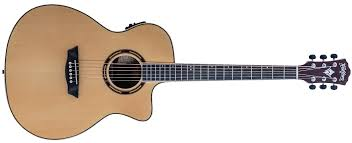
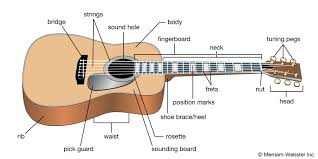
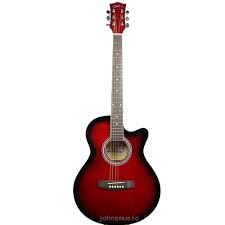
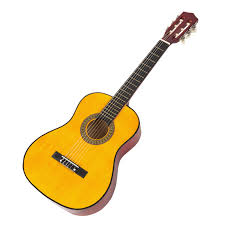
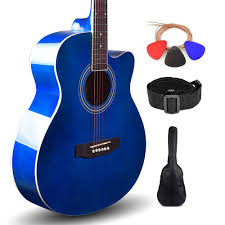
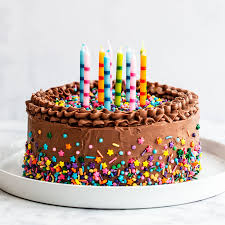
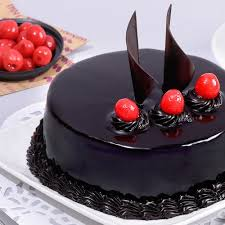
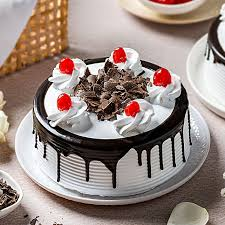
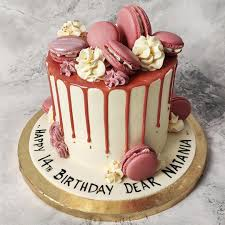
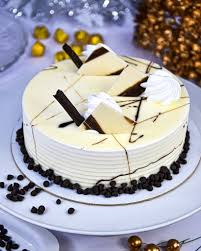
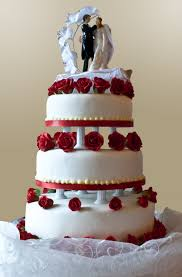
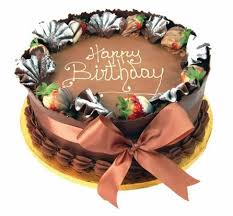
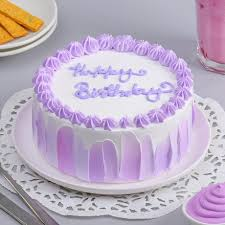
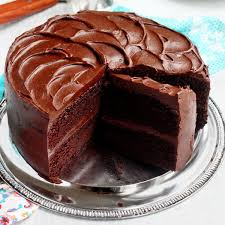
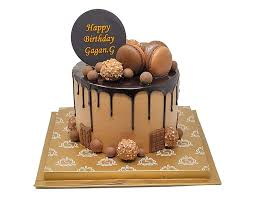

In [11]:
while current_keyword_index < len(keywords):
    keyword = keywords[current_keyword_index]
    
    try:
        search_box = driver.find_element(By.XPATH, '//textarea [@class="gLFyf"]')
        search_box.clear()
        search_box.send_keys(keyword)
        search_box.send_keys(Keys.RETURN)
        time.sleep(5)

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(10)

        images = driver.find_elements(By.XPATH, '//img[@class="YQ4gaf"]')[:10]

        keyword_image_urls = []
        for img in images:
            src = img.get_attribute('src')
            if src:
                keyword_image_urls.append(src)
                image_data.append({'Keyword': keyword, 'ImageURL': src})

        print(f"Keyword: {keyword}, Number of Image URLs: {len(keyword_image_urls)}, URLs: {keyword_image_urls}")

        

    except NoSuchElementException as e:
        print(f"element not found: {e}")
    except Exception as e:
        print(f"an error occurred: {e}")

    current_keyword_index += 1

    time.sleep(15)


In [13]:
df = pd.DataFrame(image_data)

In [14]:
print(df)

#quit driver
driver.quit()

             Keyword                                           ImageURL
0             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
1             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
2             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
3             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
4             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
5             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
6             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
7             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
8             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
9             fruits  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
10              cars  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
11              cars  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...
12              cars  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQA

# ========================================================================

# Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.


In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import warnings
from selenium.common.exceptions import NoSuchElementException
warnings.filterwarnings('ignore')

In [2]:
driver = webdriver.Chrome()
driver.maximize_window()

In [3]:
driver.get("https://www.flipkart.com/")

In [4]:
search_box = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[1]/div/div/div/div/div[1]/div/div/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search_box.send_keys('smartphone')
search_box.send_keys(Keys.RETURN)

In [5]:
product_url = []
brand_name= []
smartphone_name = []
color = []
ram = []
storage_rom = []
primary_camera = []
secondary_camera = []
display_size = []
battery_capacity = []
price = []


In [6]:
products_url = driver.find_elements(By.XPATH,'//div [@class="tUxRFH"]/a')
    
for i in products_url:
    url = i.get_attribute('href')
    product_url.append(url)

In [13]:
for i in product_url:
    driver.get(i)
    
    #brand_name
    try:
        brands_name = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[4]/a')
        brand_name.append(brands_name.text)
    except NoSuchElementException as e:
        brand_name.append("-")   
    
    #smartphone_name
    try:
        smartphones_name = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[3]/td[2]/ul/li' )
        smartphone_name.append(smartphones_name.text)
    except NoSuchElementException as e:
        smartphone_name.append("-") 
        
   #price
    try:
        prices = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        price.append(prices.text)
    except NoSuchElementException as e:
        price.append("-")  
        
    #color
    try:
        colors = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div/div[1]/table/tbody/tr[4]/td[2]/ul/li ')
        color.append(colors.text)
    except NoSuchElementException as e:
        color.append("-") 
        
     #ram
    try:
        ram_m = driver.find_element(By.XPATH, '//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
        ram.append(ram_m.text)
    except NoSuchElementException as e:
        ram.append("-") 
        
      #rom
    try:
        rom = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul/li')
        storage_rom.append(rom.text)
    except NoSuchElementException as e:
        storage_rom.append("-")  
        
       #p_camera
    try:
        p_camera = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
        primary_camera.append(p_camera.text)
    except NoSuchElementException as e:
        primary_camera.append("-")  
        
       #s_camera
    try:
        s_camera = driver.find_element(By.XPATH,"//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[6]/td[2]/ul/li")
        secondary_camera.append(s_camera.text)
    except NoSuchElementException as e:
        secondary_camera.append("-")    
        
        #d_size
    try:
        d_size = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]')
        display_size.append(d_size.text)
    except NoSuchElementException as e:
        display_size.append("-")   
        
        #battery_c
    try:
        battery_c = driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        battery_capacity.append(battery_c .text)
    except NoSuchElementException as e:
        battery_capacity.append("-")   

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2363299641.py, line 55)

In [63]:
print(len(product_url),len(brand_name),len(smartphone_name),len(color),len(ram),len(storage_rom),len(primary_camera),len(secondary_camera),len(display_size),len(battery_capacity),len(price))

24 24 24 24 24 24 24 24 24 24 24


In [64]:
df=pd.DataFrame({})
df['Product Urls']=product_url
df['Name of the product']=smartphone_name
df['Brand']=brand_name
df['Price']=price
df['Color']=color
df['RAM']=ram
df['ROM']=storage_rom
df['Primary_cam']=primary_camera
df['Secondary_cam']=secondary_camera
df['Battery']=battery_capacity
df['Display']=display_size
df

,Product Urls,Name of the product,Brand,Price,Color,RAM,ROM,Primary_cam,Secondary_cam,Battery,Display
0,https://www.flipkart.com/realme-gt-6-fluid-sil...,GT 6,realme Mobiles,"₹44,999",Fluid Silver,-,-,-,-,5500 mAh Battery,17.22 cm (6.78 inch) Full HD+ Display
1,https://www.flipkart.com/xiaomi-14-civi-shadow...,14 CIVI,Mi Mobiles,"₹42,999",Shadow Black,,-,-,-,4700 mAh Battery,16.64 cm (6.55 inch) Display
2,https://www.flipkart.com/motorola-g34-5g-ocean...,G34 5G,MOTOROLA Mobiles,"₹11,999",Ocean Green,,,-,,5000 mAh Battery,16.51 cm (6.5 inch) HD+ Display
3,https://www.flipkart.com/samsung-galaxy-f14-5g...,Galaxy F14 5G,SAMSUNG Mobiles,"₹12,490",OMG Black,-,,-,-,6000 mAh Battery,16.76 cm (6.6 inch) Full HD+ Display
4,https://www.flipkart.com/motorola-g34-5g-ice-b...,G34 5G,MOTOROLA Mobiles,"₹11,999",Ice Blue,,,-,,5000 mAh Battery,16.51 cm (6.5 inch) HD+ Display
5,https://www.flipkart.com/poco-m6-pro-5g-power-...,M6 Pro 5G,POCO Mobiles,"₹9,999",Power Black,-,,-,-,5000 mAh Battery,17.25 cm (6.79 inch) Full HD+ Display
6,https://www.flipkart.com/xiaomi-14-civi-cruise...,14 CIVI,Mi Mobiles,"₹42,999",Cruise Blue,,-,-,-,4700 mAh Battery,16.64 cm (6.55 inch) Display
7,https://www.flipkart.com/xiaomi-14-civi-cruise...,14 CIVI,Mi Mobiles,"₹47,999",Cruise Blue,-,-,-,-,4700 mAh Battery,16.64 cm (6.55 inch) Display
8,https://www.flipkart.com/samsung-galaxy-f14-5g...,Galaxy F14 5G,SAMSUNG Mobiles,"₹12,490",GOAT Green,-,,-,-,6000 mAh Battery,16.76 cm (6.6 inch) Full HD+ Display
9,https://www.flipkart.com/samsung-galaxy-f14-5g...,Galaxy F14 5G,SAMSUNG Mobiles,"₹12,490",B.A.E. Purple,-,,-,-,6000 mAh Battery,16.76 cm (6.6 inch) Full HD+ Display


# ===============================================================

# Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [39]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [40]:
driver = webdriver.Chrome()
driver.maximize_window()

In [41]:
driver.get("https://www.google.com/maps")

In [42]:
# input the city 
city_name = input("Enter the city name: ")

Enter the city name: bangalore


In [43]:
search_box = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.XPATH, "//input[@id='searchboxinput']"))
)
search_box.clear()
search_box.send_keys(city_name)
search_box.send_keys(Keys.RETURN)

In [44]:
#url of current_city
current_url = driver.current_url

In [45]:
print(current_url)

https://www.google.com/maps/place/Bengaluru,+Karnataka/@12.9537902,77.3012693,10z/data=!3m1!4b1!4m6!3m5!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627!16zL20vMDljMTc?entry=ttu


In [46]:
if '@' in current_url:
    url_parts = current_url.split('@')[1].split(',')
    latitude = url_parts[0]
    longitude = url_parts[1]
    print(f"Coordinates of {city_name}:")
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
else:
    print("Could not parse the coordinates from the URL.")

Coordinates of bangalore:
Latitude: 12.9537902
Longitude: 77.3012693


# =================================================================

In [47]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import warnings
from selenium.common.exceptions import NoSuchElementException
warnings.filterwarnings('ignore')

In [48]:
driver = webdriver.Chrome()
driver.maximize_window()
time.sleep(3)

In [49]:
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

In [50]:
products_url = []
product_name = []
operating_system= []
processor = []
display_size = []

In [51]:
product_urls = driver.find_elements(By.XPATH,'//div [@class="rh_gr_top_middle mb10 colored_rate_bar"]/h3/a ')
    
for i in product_urls:
    url = i.get_attribute('href')
    products_url.append(url)

In [52]:
print(len(products_url))

10


In [53]:
for i in products_url:
    driver.get(i)
    
    
    
    #product_name
    try:
        products_name = driver.find_element(By.XPATH,'//*[@id="section-woo-custom-wheretobuy"]/div[2]/div[1]/div/div[2]/div[2]/div/a')
        product_name.append(products_name.text)
    except NoSuchElementException as e:
        product_name.append("-") 
        
   #processor
    try:
        processors = driver.find_element(By.XPATH,'//*[@id="section-additional_information"]/div[2]/table/tbody/tr[10]/td/table/tbody/tr[2]/td/p')
        processor.append(processors.text)
    except NoSuchElementException as e:
        processor.append("-")  
  
        
     #operating_systems
    try:
        operating_systems = driver.find_element(By.XPATH, '//td [@class="woocommerce-product-attributes-item__value"]/p ')
        operating_system.append(operating_systems.text)
    except NoSuchElementException as e:
        operating_system.append("-") 
        
      #display_sizes
    try:
        display_sizes = driver.find_element(By.XPATH, '//*[@id="section-additional_information"]/div[2]/table/tbody/tr[4]/td/table/tbody/tr/td/p')
        display_size.append(display_sizes.text)
    except NoSuchElementException as e:
        display_size.append("-")    

In [54]:
print(len(product_name),len(operating_system),len(display_size),len(processor))

10 10 10 10


In [55]:
df=pd.DataFrame({})
df['Product_URL']=products_url
df['Processor']=processor
df['Product_Name']=product_name
df['Operating_System']=operating_system
df['Display_Size']=display_size
df

,Product_URL,Processor,Product_Name,Operating_System,Display_Size
0,https://www.digit.in/laptops/msi-titan-gt77-hx...,24,"MSI Titan GT77 HX, Intel 13th Gen. i9-13980HX,...",Windows 11 Home,17.3
1,https://www.digit.in/laptops/asus-rog-strix-sc...,36 MB,"ASUS ROG Strix Scar 16, Intel® Core™ i9 14900H...",Windows 11 Home,16
2,https://www.digit.in/laptops/msi-raider-ge78hx...,13th Gen Intel Core i9-13980HX,"MSI Raider GE78HX, Intel 13th Gen. i9-13980HX,...",Windows 11 Home,17
3,https://www.digit.in/laptops/asus-rog-strix-sc...,36 MB,"ASUS ROG Strix Scar 18 (2023), Intel Core i9 1...",Windows 11 Home,18
4,https://www.digit.in/laptops/lenovo-legion-pro...,NVIDIA GeForce RTX 4090,"Lenovo Legion Pro 7i 16"" QHD+ 500nits Gaming L...",Windows 11 Home,16
5,https://www.digit.in/laptops/omen-by-hp-17-ck2...,36 MB,"HP OMEN Gaming Laptop, 13th Gen Intel Core i9-...",Windows 11 Home,17.3
6,https://www.digit.in/laptops/dell-alienware-m1...,36 MB,RAYA Silicone Keyboard Skin Cover for Dell Ali...,Windows 11 Home,18
7,https://www.digit.in/laptops/dell-alienware-x1...,24 MB,"Dell Alienware X16 R1 Gaming, Intel Core i9-13...",Windows 11 Home,16
8,https://www.digit.in/laptops/msi-raider-ge67hx...,NVIDIA GeForce RTX 3080 Ti,"MSI Raider GE67HX, Intel 12th Gen. i9-12900HX,...",Windows 11 Home,15.6
9,https://www.digit.in/laptops/acer-predator-hel...,13th Gen Intel Core i9-13900HX,Acer Predator Helios 16 Gaming Laptop (Intel C...,Windows 11 Home,16


# ==============================================

# Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description. 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import time
import pandas as pd

In [ ]:
driver = webdriver.Chrome()
driver.maximize_window()
time.sleep(2)

In [ ]:

url = 'https://www.hostelworld.com/findabed.php/ChosenCity.London/ChosenCountry.England'
driver.get(url)

time.sleep(10)


In [ ]:
# Lists 
hostel_names = []
distances = []
ratings = []
total_reviews = []
overall_reviews = []
private_prices = []
dorm_prices = []
facilities_list = []
property_descriptions = []

In [ ]:

hostel_elements = driver.find_elements(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]')

for hostel in hostel_elements:
    # Hostel Name
    try:
        hostel_name = hostel.find_element(By.XPATH, '//div [@class="property-name"]/span')
        hostel_names.append(hostel_name.text)
    except NoSuchElementException as e:
        hostel_names.append("-")

    # Distance from city center
    try:
        distance = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[2]/span[2]')
        distances.append(distance.text)
    except NoSuchElementException as e:
        distances.append("-")

    # Ratings
    try:
        rating = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[1]/div[3]/div/div[1]/span[1]')
        ratings.append(rating.text)
    except NoSuchElementException as e:
        ratings.append("-")

    # Total reviews
    try:
        total_review = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[1]/div[3]/div/div[2]/span')
        total_reviews.append(total_review.text)
    except NoSuchElementException as e:
        total_reviews.append("-")



    # Privates from price
    try:
        private_price = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[5]/div/div[1]/div[2]/strong')
        private_prices.append(private_price.text)
    except NoSuchElementException as e:
        private_prices.append("-")

    # Dorms from price
    try:
        dorm_price = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[5]/div/div[2]/div[2]/strong')
        dorm_prices.append(dorm_price.text)
    except NoSuchElementException as e:
        dorm_prices.append("-")

    # Facilities
    try:
        facilities = hostel.find_elements(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[8]/div/ul/li[1]/h3/span')
        facilities_text = [facility.text for facility in facilities]
        facilities_list.append(', '.join(facilities_text))
    except NoSuchElementException as e:
        facilities_list.append("-")

    # Property Description
    try:
        property_description = hostel.find_element(By.XPATH, '//*[@id="__layout"]/div/div[3]/main/div[2]/section[1]/div[3]/a[1]/div[2]/div[3]/span')
        property_descriptions.append(property_description.text)
    except NoSuchElementException as e:
        property_descriptions.append("-")


In [ ]:
print("Length of hostel_names:", len(hostel_names))
print("Length of distances:", len(distances))
print("Length of ratings:", len(ratings))
print("Length of total_reviews:", len(total_reviews))
print("Length of private_prices:", len(private_prices))
print("Length of dorm_prices:", len(dorm_prices))
print("Length of facilities_list:", len(facilities_list))
print("Length of property_descriptions:", len(property_descriptions))

In [ ]:
for i in range(len(hostel_names)):
    print(f"Hostel Name: {hostel_names[i]}")
    print(f"Distance from city center: {distances[i]}")
    print(f"Rating: {ratings[i]}")
    print(f"Total Reviews: {total_reviews[i]}")
    print(f"Privates from Price: {private_prices[i]}")
    print(f"Dorms from Price: {dorm_prices[i]}")
    print(f"Facilities: {facilities_list[i]}")
    print(f"Property Description: {property_descriptions[i]}")
    print("-----")
